### Extreme Gradient Boosting - Binary Classifier
This notebook implements an Extreme Gradient Boosting (XGB) machine learning model binary classifier from sklearn - this falls under a type of ensemble machine learning.

This dataset is transformed using scaling functions from sklearn.

Refer to below sklearn documentation for impact of scalers for input features.
- https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html

We import pandas, sklearn, train_test_split and the sklearn extreme gradient boosting library option.

In [1]:
import pandas as pd
import sklearn
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from matplotlib import pyplot

/Users/niallguerin/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


#### Exploratory Data Analysis
We use the diabetes dataset. For information about this dataset, refer to the Kaggle dataset library summary:
- https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

This will predicte whether a patient does or does not have diabetes. We have multiple predictor variables and one target variable - Outcome.

In [2]:
diabetes_df = pd.read_csv("../datasets/diabetes.csv")

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes_df.shape

(768, 9)

In [7]:
diabetes_df.size

6912

In [8]:
diabetes_df.ndim

2

In [9]:
# The .T at the end displays the transpose i.e. we flip the columns to be the rows and rows become the columns
diabetes_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
diabetes_df.sample(n=5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
312,2,155,74,17,96,26.6,0.433,27,1
66,0,109,88,30,0,32.5,0.855,38,1
52,5,88,66,21,23,24.4,0.342,30,0
478,8,126,74,38,75,25.9,0.162,39,0
100,1,163,72,0,0,39.0,1.222,33,1


Verify if any null values in the dataframe for a given data column.

In [11]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
diabetes_df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [13]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [14]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

The following calculates the pairwise correlation of columns. It does not include NA/null values.
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [15]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Produce data visualization histogram plots for the pandas dataframe for the diabetes dataset and focus on the input feature distributions as we are going to scale the input data before training the model.

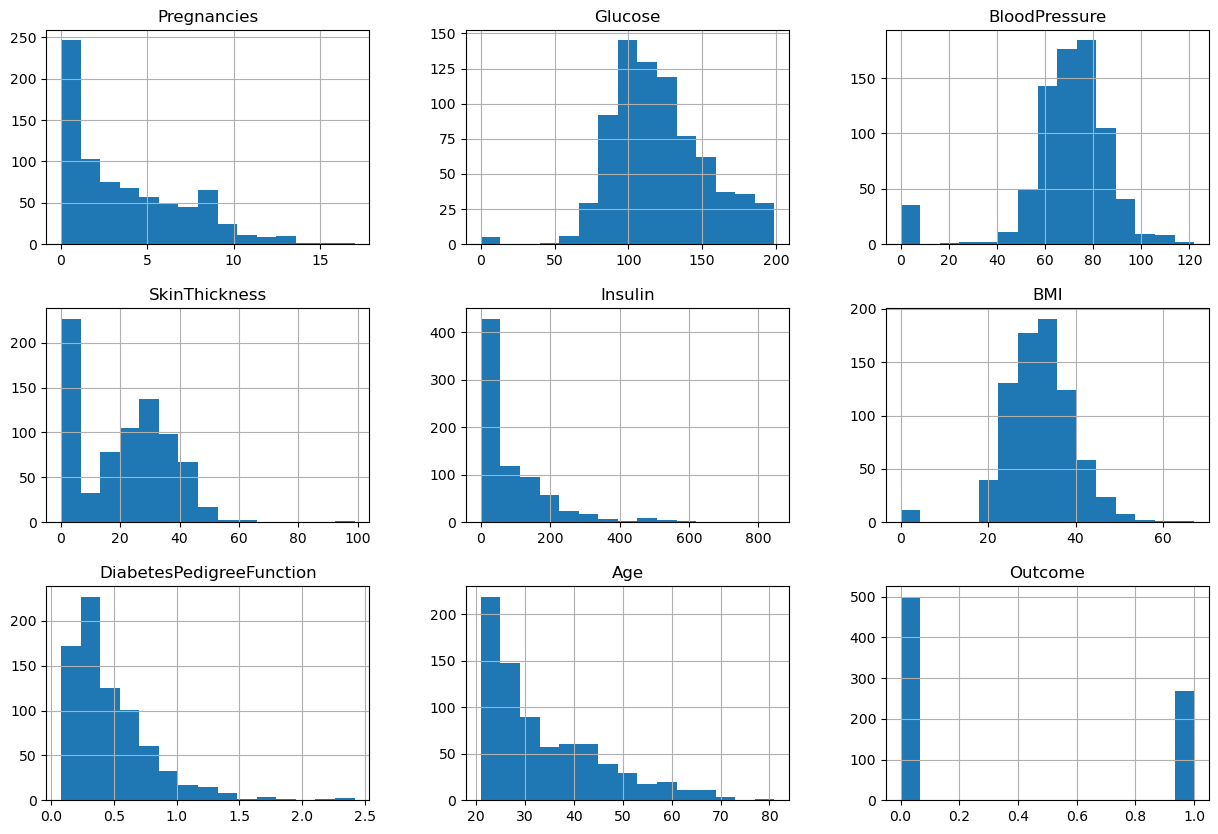

In [16]:
# Get histogram for each numeric variable - 9 variables so layout = 3x3
features_including_output_label = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
diabetes_df[features_including_output_label].hist(bins=15, figsize=(15, 10), layout=(3, 3));

##### Transform the dataset input features
Transform the data input features. This is important for SVM as sklearn guides recommend it and SVM may not perform well without the preprocessing transformation.

In [17]:
from sklearn import preprocessing

For SVM, perform the transformation on all features of the dataset, omitting the response variable.

In [18]:
# make a copy of the original dataframe
diabetes_df_scaled = diabetes_df.iloc[: , :8]

In [19]:
diabetes_df_scaled = preprocessing.scale(diabetes_df_scaled)

##### Create a train:test split on the dataset
Next, we define our train:test split using sklearn library. This lets us defined our supervised learning training set and a holdout test data subset. We will use a 10% portion of the dataset as a test set. We will use this to test the accuracy of the ML model on data it has not seen before in training and if it has overfit during training or can generalize to unseen data.

In [20]:
# split into features and categorical predictor variable (0 or 1)
X = diabetes_df_scaled#.iloc[: , :8]
y = diabetes_df.iloc[: , -1]

# split into train and test sets with sklearn native train_test_split 10% test, set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

In [21]:
X_train

array([[-0.54791859, -0.62264204, -0.57412775, ..., -1.29363432,
        -0.95700404, -0.95646168],
       [-0.25095213, -0.30967058, -0.36733675, ..., -1.19209893,
        -0.99626558, -1.04154944],
       [-0.84488505,  0.69183807,  0.25303625, ..., -0.73518964,
        -0.65197205, -1.04154944],
       ...,
       [-0.84488505, -1.31117923, -0.47073225, ...,  1.4605133 ,
         0.62251803, -0.87137393],
       [-1.14185152,  1.88112959,  0.97680475, ...,  1.43512945,
        -0.75465609, -0.61611067],
       [-0.25095213,  0.25367803, -0.26394125, ..., -0.7098058 ,
        -0.76371644, -0.44593516]])

In [22]:
X_test

array([[-1.14185152, -0.93561349, -0.05715025,  0.71908574,  1.13051757,
         1.00360402, -0.27445722, -0.70119842],
       [-0.25095213,  1.63075243,  0.66661825,  1.72273472,  3.34465603,
         0.81322515,  5.02887118, -0.70119842],
       [-0.84488505,  0.81702665,  1.28699125,  1.28363829, -0.69289057,
         2.19664492, -0.34391995, -0.53102292],
       [-0.54791859, -0.43485916,  0.25303625,  0.59362962,  0.17539902,
         0.20401277, -0.20499449, -0.87137393],
       [ 2.12477957,  0.53535234,  0.25303625,  0.34271738,  0.55744644,
         0.52131088,  0.25708367,  1.4259954 ],
       [ 0.63994726,  0.41016376,  0.56322275,  1.03272605,  2.51978092,
         1.80319526, -0.70633419,  1.08564439],
       [ 1.53084665, -0.02799627,  0.14964075,  0.09180513, -0.2066484 ,
        -1.42055357,  0.78862456,  1.2558199 ],
       [-1.14185152, -0.62264204, -0.2122435 ,  0.4681735 , -0.69289057,
        -0.93826044, -0.70935431, -0.95646168],
       [-0.54791859, -0.49745345

In [23]:
X_train.shape

(691, 8)

In [24]:
X_test.shape

(77, 8)

##### Machine Learning Model and Training
Now we create an Extreme Gradient Boosting (XGB) classifier machine learning model and fit it to our training dataset.

In [25]:
# Parameter initial values based on testing output fro XGBoost test case in separate cell run and I have only made
# minor tweaks to those defaults below using the sklearn implementation and we get good accuracy on training data and
# acceptable accuracy (could be better with tuning) on the test data.
xgb_clf = GradientBoostingClassifier(n_estimators=500, learning_rate=0.5, max_depth=5, random_state=44)

In [26]:
xgb_clf.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=5, n_estimators=500,
                           random_state=44)

In [27]:
xgb_clf.score(X_train, y_train) # 100% accuracy on training data, 79% on the test data

1.0

##### XGB: Run Predictions, Evaluate Performance
We now run the predictive analytics against the test dataset and calculate the accuracy of the ML model when predicting on new data, our test dataset.

In [28]:
y_pred = xgb_clf.predict(X_test)

In [29]:
xgb_clf.score(X_test, y_test)

0.7922077922077922

Include the sklearn classification report for precision, recall, f1-score, and support metrics.

In [30]:
metrics = classification_report(y_test, y_pred, output_dict=False)
print(metrics)

              precision    recall  f1-score   support

           0       0.78      0.86      0.82        42
           1       0.81      0.71      0.76        35

    accuracy                           0.79        77
   macro avg       0.79      0.79      0.79        77
weighted avg       0.79      0.79      0.79        77



In [31]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[36,  6],
       [10, 25]])

Below is a useful sklearn confusion matrix display utility plot. I always refer to it ever I need to check the array dimensions for true label, predicted labels. Seaborn is used later for an alternative display plot with text labels.

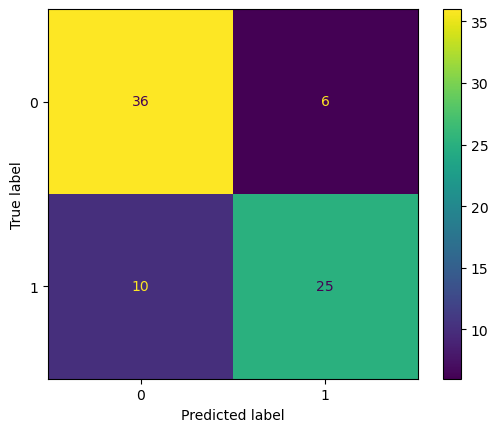

In [32]:
ConfusionMatrixDisplay(cm).plot()

<AxesSubplot:>

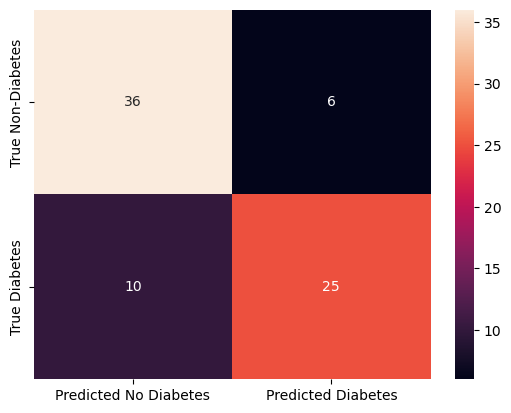

In [33]:
df_confusion_matrix = pd.DataFrame(cm, ['True Non-Diabetes', 'True Diabetes'],
                     ['Predicted No Diabetes', 'Predicted Diabetes'])

sns.heatmap(df_confusion_matrix, annot=True, fmt='g')

#### Web References
- https://en.wikipedia.org/wiki/XGBoost
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
- https://scikit-learn.org/stable/modules/preprocessing.html#normalization
- https://stats.stackexchange.com/questions/31066/what-is-the-influence-of-c-in-svms-with-linear-kernel
- https://gradio.app/docs/